In [1]:
%reset -f
# Réinitialise l'espace de noms en supprimant les noms définis par l'utilisateur
# -f sans demander de confirmation

import pandas as pd
# Bibliothèque de manipulation et d'analyse de données
pd.set_option('display.max_rows', 200)
# Option d'affichage des lignes à un maximum de 200
pd.set_option('display.max_columns', 200)
# Option d'affichage des colonnes à un maximum de 200
pd.options.mode.use_inf_as_na = True
# Reconnaître inf comme NaN dans les calculs

from matplotlib import pyplot as plt
# Bibliothèque destinée à tracer et visualiser des données sous forme de graphiques
plt.style.use('dark_background')
# Option de définition de la couleur de l'arrière plan 


In [2]:
from dask import dataframe as dd
# Bibliothèque de traitement en parallèle de données volumineuses
# ne tenant pas en mémoire

# Le gain en performance sur des datasets 
# de plusieurs giga est conséquent par rapport à pandas, numpy

dataset = dd.read_csv(
    "./DrDoS_LDAP.csv", 
    dtype = {'SimillarHTTP': 'object'},
    blocksize='64MB')
# Enregistrer les données du fichier dans la variable dataset à l'aide de dask

dataset = dataset.compute()
# Conversion d'un dataframe dask en un dataframe pandas

In [3]:
dataset.head()
# Afficher les cinq premières lignes du dataset

Unnamed: 0                               Flow ID   Source IP   Source Port  \
0       21010         172.16.0.5-192.168.50.1-0-0-0  172.16.0.5             0   
1       20932   172.16.0.5-192.168.50.1-900-1808-17  172.16.0.5           900   
2       27876  172.16.0.5-192.168.50.1-900-58766-17  172.16.0.5           900   
3       24270  172.16.0.5-192.168.50.1-900-35228-17  172.16.0.5           900   
4        5109  172.16.0.5-192.168.50.1-900-44969-17  172.16.0.5           900   

   Destination IP   Destination Port   Protocol                   Timestamp  \
0    192.168.50.1                  0          0  2018-12-01 11:22:40.254769   
1    192.168.50.1               1808         17  2018-12-01 11:22:40.255361   
2    192.168.50.1              58766         17  2018-12-01 11:22:40.255568   
3    192.168.50.1              35228         17  2018-12-01 11:22:40.256113   
4    192.168.50.1              44969         17  2018-12-01 11:22:40.256285   

    Flow Duration   Total Fwd Packets   Total Backward Packets  \
0         9141643               85894                       28   
1               1                   2                        0   
2               2                   2                        0   
3               1                   2                        0   
4               2                   2                        0   

   Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                          0.0                           0.0   
1                       2944.0                           0.0   
2                       2944.0                           0.0   
3                       2944.0                           0.0   
4                       2944.0                           0.0   

    Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean  \
0                     0.0                     0.0                      0.0   
1                  1472.0                  1472.0                   1472.0   
2                  1472.0                  1472.0                   1472.0   
3                  1472.0                  1472.0                   1472.0   
4                  1472.0                  1472.0                   1472.0   

    Fwd Packet Length Std  Bwd Packet Length Max   Bwd Packet Length Min  \
0                     0.0                    0.0                     0.0   
1                     0.0                    0.0                     0.0   
2                     0.0                    0.0                     0.0   
3                     0.0                    0.0                     0.0   
4                     0.0                    0.0                     0.0   

    Bwd Packet Length Mean   Bwd Packet Length Std  Flow Bytes/s  \
0                      0.0                     0.0  0.000000e+00   
1                      0.0                     0.0  2.944000e+09   
2                      0.0                     0.0  1.472000e+09   
3                      0.0                     0.0  2.944000e+09   
4                      0.0                     0.0  1.472000e+09   

    Flow Packets/s   Flow IAT Mean   Flow IAT Std   Flow IAT Max  \
0     9.398967e+03       106.39591     209.905159         2968.0   
1     2.000000e+06         1.00000       0.000000            1.0   
2     1.000000e+06         2.00000       0.000000            2.0   
3     2.000000e+06         1.00000       0.000000            1.0   
4     1.000000e+06         2.00000       0.000000            2.0   

    Flow IAT Min  Fwd IAT Total   Fwd IAT Mean   Fwd IAT Std   Fwd IAT Max  \
0            0.0      9141643.0     106.430594     209.94653        2968.0   
1            1.0            1.0       1.000000       0.00000           1.0   
2            2.0            2.0       2.000000       0.00000           2.0   
3            1.0            1.0       1.000000       0.00000           1.0   
4            2.0            2.0       2.000000       0.00000           2.0   

    Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean 

In [4]:
dataset.columns = dataset.columns.str.replace(' ', '')
# Retirer les espaces dans le dataset

In [5]:
dataset.shape
# Donne la forme du dataframe :
# un tuple de dimensions indiquant le nombre de lignes : 2 181 542
# et le nombre de colonnes : 88

(2181542, 88)

In [6]:
(dataset['Label'].value_counts()) / len(dataset) * 100
# Présence de chaque label en % dans le dataset

DrDoS_LDAP    99.926107
BENIGN         0.073893
Name: Label, dtype: float64

In [7]:
dataset.drop(columns = ['FlowID', 'SourceIP', 'DestinationIP', 'Timestamp', 'SimillarHTTP', 'SourcePort', 'DestinationPort'], inplace = True)
# Modification du dataset en enlevant les colonnes :
# FlowID, SourceIP, DestinationIP, Timestamp, SimillarHTTP, SourcePort, DestinationPort

In [8]:
dataset.dropna(inplace = True)
# Supprime les valeurs manquantes dans le dataset

In [9]:
dataset.head()

Unnamed:0  Protocol  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0      21010         0       9141643            85894                    28   
1      20932        17             1                2                     0   
2      27876        17             2                2                     0   
3      24270        17             1                2                     0   
4       5109        17             2                2                     0   

   TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
0                      0.0                      0.0                 0.0   
1                   2944.0                      0.0              1472.0   
2                   2944.0                      0.0              1472.0   
3                   2944.0                      0.0              1472.0   
4                   2944.0                      0.0              1472.0   

   FwdPacketLengthMin  FwdPacketLengthMean  FwdPacketLengthStd  \
0                 0.0                  0.0                 0.0   
1              1472.0               1472.0                 0.0   
2              1472.0               1472.0                 0.0   
3              1472.0               1472.0                 0.0   
4              1472.0               1472.0                 0.0   

   BwdPacketLengthMax  BwdPacketLengthMin  BwdPacketLengthMean  \
0                 0.0                 0.0                  0.0   
1                 0.0                 0.0                  0.0   
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   BwdPacketLengthStd   FlowBytes/s  FlowPackets/s  FlowIATMean  FlowIATStd  \
0                 0.0  0.000000e+00   9.398967e+03    106.39591  209.905159   
1                 0.0  2.944000e+09   2.000000e+06      1.00000    0.000000   
2                 0.0  1.472000e+09   1.000000e+06      2.00000    0.000000   
3                 0.0  2.944000e+09   2.000000e+06      1.00000    0.000000   
4                 0.0  1.472000e+09   1.000000e+06      2.00000    0.000000   

   FlowIATMax  FlowIATMin  FwdIATTotal  FwdIATMean  FwdIATStd  FwdIATMax  \
0      2968.0         0.0    9141643.0  106.430594  209.94653     2968.0   
1         1.0         1.0          1.0    1.000000    0.00000        1.0   
2         2.0         2.0          2.0    2.000000    0.00000        2.0   
3         1.0         1.0          1.0    1.000000    0.00000        1.0   
4         2.0         2.0          2.0    2.000000    0.00000        2.0   

   FwdIATMin  BwdIATTotal  BwdIATMean     BwdIATStd  BwdIATMax  BwdIATMin  \
0        0.0    8487477.0    314351.0  1.147263e+06  5975703.0        0.0   
1        1.0          0.0         0.0  0.000000e+00        0.0        0.0   
2        2.0          0.0         0.0  0.000000e+00        0.0        0.0   
3        1.0          0.0         0.0  0.000000e+00        0.0        0.0   
4        2.0          0.0         0.0  0.000000e+00        0.0        0.0   

   FwdPSHFlags  BwdPSHFlags  FwdURGFlags  BwdURGFlags  FwdHeaderLength  \
0            0            0            0            0                0   
1            0            0            0            0               -2   
2            0            0            0            0               -2   
3            0            0            0            0               -2   
4            0            0            0            0               -2   

   BwdHeaderLength  FwdPackets/s  BwdPackets/s  MinPacketLength  \
0                0  9.395904e+03      3.062907              0.0   
1                0  2.000000e+06      0.000000           1472.0   
2                0  1.000000e+06      0.000000           1472.0   
3                0  2.000000e+06      0.000000           1472.0   
4                0  1.000000e+06      0.000000           1472.0   

   MaxPacketLength  PacketLengthMean  Pa

In [10]:
cols = dataset.drop(columns=['Label']).columns.tolist()
# Supprimer la colonne label, retourne une liste de valeurs
for col in cols:
    dataset[col] = pd.to_numeric(dataset[col], errors = 'coerce').fillna(0)
    
# Conversion de l'ensemble des colonnes en format numérique 
# si elle n'est pas convertible est devient NaN ('coerce')
# Les valeurs NaN deviennent 0 (fillna(0))

In [11]:
labels = pd.get_dummies(dataset['Label'])
# Conversion de données catégorielles en variables indicatrices

In [12]:
labels.head()
# Affichage des cinq premières lignes de la variable labels

BENIGN  DrDoS_LDAP
0       0           1
1       0           1
2       0           1
3       0           1
4       0           1

In [13]:
X = dataset.drop(columns = ["Label"], axis = 1)
# Enregistre dans X le dataset sans la colonne Label 
#(axis=1 : l'axe verticale )
y = labels.BENIGN
# Enregistre dans y les valeurs de la colonne BENIGN

In [14]:
X.head()
# Affichage des cinq premières lignes de la variable X

Unnamed:0  Protocol  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0      21010         0       9141643            85894                    28   
1      20932        17             1                2                     0   
2      27876        17             2                2                     0   
3      24270        17             1                2                     0   
4       5109        17             2                2                     0   

   TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
0                      0.0                      0.0                 0.0   
1                   2944.0                      0.0              1472.0   
2                   2944.0                      0.0              1472.0   
3                   2944.0                      0.0              1472.0   
4                   2944.0                      0.0              1472.0   

   FwdPacketLengthMin  FwdPacketLengthMean  FwdPacketLengthStd  \
0                 0.0                  0.0                 0.0   
1              1472.0               1472.0                 0.0   
2              1472.0               1472.0                 0.0   
3              1472.0               1472.0                 0.0   
4              1472.0               1472.0                 0.0   

   BwdPacketLengthMax  BwdPacketLengthMin  BwdPacketLengthMean  \
0                 0.0                 0.0                  0.0   
1                 0.0                 0.0                  0.0   
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   BwdPacketLengthStd   FlowBytes/s  FlowPackets/s  FlowIATMean  FlowIATStd  \
0                 0.0  0.000000e+00   9.398967e+03    106.39591  209.905159   
1                 0.0  2.944000e+09   2.000000e+06      1.00000    0.000000   
2                 0.0  1.472000e+09   1.000000e+06      2.00000    0.000000   
3                 0.0  2.944000e+09   2.000000e+06      1.00000    0.000000   
4                 0.0  1.472000e+09   1.000000e+06      2.00000    0.000000   

   FlowIATMax  FlowIATMin  FwdIATTotal  FwdIATMean  FwdIATStd  FwdIATMax  \
0      2968.0         0.0    9141643.0  106.430594  209.94653     2968.0   
1         1.0         1.0          1.0    1.000000    0.00000        1.0   
2         2.0         2.0          2.0    2.000000    0.00000        2.0   
3         1.0         1.0          1.0    1.000000    0.00000        1.0   
4         2.0         2.0          2.0    2.000000    0.00000        2.0   

   FwdIATMin  BwdIATTotal  BwdIATMean     BwdIATStd  BwdIATMax  BwdIATMin  \
0        0.0    8487477.0    314351.0  1.147263e+06  5975703.0        0.0   
1        1.0          0.0         0.0  0.000000e+00        0.0        0.0   
2        2.0          0.0         0.0  0.000000e+00        0.0        0.0   
3        1.0          0.0         0.0  0.000000e+00        0.0        0.0   
4        2.0          0.0         0.0  0.000000e+00        0.0        0.0   

   FwdPSHFlags  BwdPSHFlags  FwdURGFlags  BwdURGFlags  FwdHeaderLength  \
0            0            0            0            0                0   
1            0            0            0            0               -2   
2            0            0            0            0               -2   
3            0            0            0            0               -2   
4            0            0            0            0               -2   

   BwdHeaderLength  FwdPackets/s  BwdPackets/s  MinPacketLength  \
0                0  9.395904e+03      3.062907              0.0   
1                0  2.000000e+06      0.000000           1472.0   
2                0  1.000000e+06      0.000000           1472.0   
3                0  2.000000e+06      0.000000           1472.0   
4                0  1.000000e+06      0.000000           1472.0   

   MaxPacketLength  PacketLengthMean  Pa

In [15]:
y.head()
# Affichage des cinq premières lignes de la variable y

0    0
1    0
2    0
3    0
4    0
Name: BENIGN, dtype: uint8

/Users/patrice/miniforge3/envs/tf/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


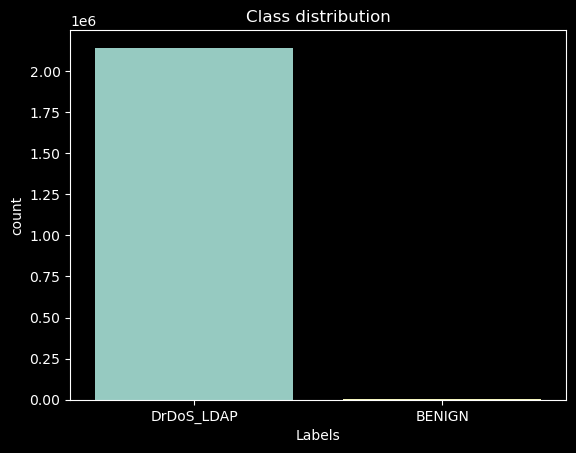

In [16]:
import seaborn as sns
# Seaborn est une bibliothèque Python de visualisation de données basée sur matplotlib 

# Affichage du nombre de DRDos_LDAP et BENIGN : #

sns.countplot(dataset['Label'])
# Affichage du nombre de valeurs de chaque variable présent dans la colonne Label du dataset
plt.xlabel('Labels')
# Le titre en x
plt.title('Class distribution')
# Le titre du graphique
plt.savefig("class_distribution.png")
# Enregistrer le graphique dans un fichier dénommé class_distribution.png
plt.show()
# Montrer le graphique

In [17]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    test_size = .2, 
    stratify = y, 
    random_state = 1)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val, 
    test_size = .25, 
    stratify = y_train_val, 
    random_state=1)

In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [20]:
X_train_scaled = pd.DataFrame(
    std.fit_transform(X_train),
    columns = X_train.columns)

In [21]:
X_train_scaled.shape

(1285734, 80)

In [22]:
X_train = X_train_scaled.values.reshape(
    X_train_scaled.shape[0], 
    X_train_scaled.shape[1], 1)
# Modifier la forme du dataframe en (1285734, 80, 1) pour convenir 
# à la forme demandé en entrée par un modèle de type tensorflow

In [23]:
X_train.shape
# Donne la forme du dataframe :
# un tuple de dimensions indiquant la longueur, le nombre de lignes : 2 181 542
# et la largeur, le nombre de colonnes : 88
# et la profondeur : 1

(1285734, 80, 1)

In [24]:
from tensorflow.keras.models import Sequential 
# Le modèle séquentiel 
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
# Les couches du modèles

# LSTM : Long Short Term Memory, c'est une variante de RNN qui a une cellule d'état de mémoire 
# pour apprendre le contexte des mots qui sont plus loin dans le texte pour porter une signification 
# contextuelle plutôt que juste des mots voisins comme dans le cas de RNN. Ainsi, cette couche 
# conserve ou supprime des données en tenant compte de l'entrée actuelle, de la sortie précédente 
# et de la mémoire précédente.

# Bidirectional : Wrapper bidirectionnel pour les RNN. LSTM dans son noyau, 
# préserve les informations des entrées qui l'ont déjà traversé en utilisant un mémoire. 
# Le LSTM unidirectionnel ne conserve que les informations du passé car les seules entrées 
# qu'il a vues proviennent du passé L'utilisation bidirectionnelle exécutera les entrées de 
# deux manières, une du passé au futur et une du futur au passé.

# Dense Layer : la couche dense ajoute une couche entièrement connectée dans le modèle. 
# L'argument passé spécifie le nombre de nœuds dans cette couche. La dernière couche dense 
# a l'activation "Sigmoïde", qui est utilisée pour transformer l'entrée en un nombre compris 
# entre 0 et 1. Les activations sigmoïdes sont généralement utilisées lorsque nous avons 2 
# catégories pour la sortie.

# L'optimiseur adam est le plus utilisé en terme de gain de rapidité de l'entraînement 
# en gardant des résultats très corrects. 

# La fonction cout est Binary Crossentropy étant donné que la sortie peut être uniquement 0 ou 1, 
# comme un nombre binaire.

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


Metal device set to: Apple M1


2022-08-28 20:48:32.979044: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-28 20:48:32.979313: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Model Callbacks (Rappels de modèle) : ##
# Callbacks est la classe de base abstraite utilisée pour créer de nouveaux rappels. 
# Ces objets effectue des actions à différentes étapes de la formation. 
# Il est possible d'écrire des journaux tensorBoard après chaque lot d'entraînement, 
# d'enregistrer périodiquement le modèle, arrêter l'entraînement plus tôt, 
# ou encore avoir accès à des statistiques au format csv pendant l'entraînement.

## ModelCheckpoint : ## 
# Rappel pour enregistrer le modèle Keras ou les pondérations du modèle à une certaine fréquence.

#Arguments :

# filepath : chaîne ou PathLike, chemin pour enregistrer le fichier modèle
# monitor : nom de la métrique à surveiller
# save_best_only : si save_best_only=True, il n'enregistre que lorsque le modèle est considéré comme le "meilleur" et le dernier meilleur modèle en fonction de la quantité surveillée ne sera pas écrasé
# verbose : Mode de verbosité, 0 ou 1. Le mode 0 est silencieux et le mode 1 affiche des messages lorsque le rappel entreprend une action.


## EarlyStopping :## 
# arrêtez l'entraînement lorsqu'une métrique surveillée a cessé de s'améliorer.

# Arguments :

# monitor : quantité à surveiller
# min_delta : changement minimum de la quantité surveillée pour être considéré comme une amélioration, 
# c'est-à-dire un changement absolu inférieur à min_delta, comptera comme aucune amélioration.
# patience : nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté. 
# Pour plus de détails sur les callbacks : https://keras.io/api/callbacks/


callbacks = [ModelCheckpoint('models/Bi_LSTM.h5', monitor='accuracy', save_best_only=True, verbose=1),
             EarlyStopping(monitor='accuracy', min_delta=1e-4, patience=5)]

In [26]:
history = model.fit(
    X_train, 
    y_train, 
    epochs = 1, 
    validation_split = 0.2, 
    callbacks = callbacks, 
    verbose = 1)

2022-08-28 20:48:33.478573: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-28 20:48:35.097583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-28 20:48:35.314268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-28 20:48:35.326731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-28 20:48:35.627930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-28 20:48:35.646232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32144/32144 [==============================] - ETA: 0s - loss: 9.4851e-04 - accuracy: 0.9998

2022-08-28 21:07:41.250223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-28 21:07:41.340307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-28 21:07:41.349005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: accuracy improved from -inf to 0.99975, saving model to models/Bi_LSTM.h5
32144/32144 [==============================] - 1319s 41ms/step - loss: 9.4851e-04 - accuracy: 0.9998 - val_loss: 5.2644e-04 - val_accuracy: 0.9998


In [27]:
# Affichage de la moyenne des prédictions et de la perte #
accr = model.evaluate(X_test,y_test)
print('Ensemble de test\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(
    accr[0],
    accr[1]))


2022-08-28 21:10:33.283928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-28 21:10:33.367107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-28 21:10:33.374454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13394/13394 [==============================] - 304s 23ms/step - loss: 0.0393 - accuracy: 0.9780
Ensemble de test
  Loss: 0.039
  Accuracy: 0.978


In [28]:
# Prédiction sur les X_test #
y_test_pred = model.predict(
    X_test, 
    verbose = 1)

2022-08-28 21:15:37.310357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-28 21:15:37.378974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-28 21:15:37.386506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13394/13394 [==============================] - 278s 21ms/step


In [29]:
# Calcul du nombre de true_positif, true_negatif, false_positif, false_negatif : #
true_positif = 0
true_negatif = 0 
false_positif = 0 
false_negatif = 0

pred = y_test_pred.flatten().round()
pred = pred.tolist()
y_test = y_test.tolist()
for i in range(len(y_test)):
  if pred[i]== 1 and y_test[i]==1:
    true_positif += 1
  elif pred[i]==0 and y_test[i]==0:
    true_negatif += 1
  elif pred[i]==0 and y_test[i]==1:
    false_positif += 1
  elif pred[i]==1 and y_test[i]==0:
    false_negatif += 1

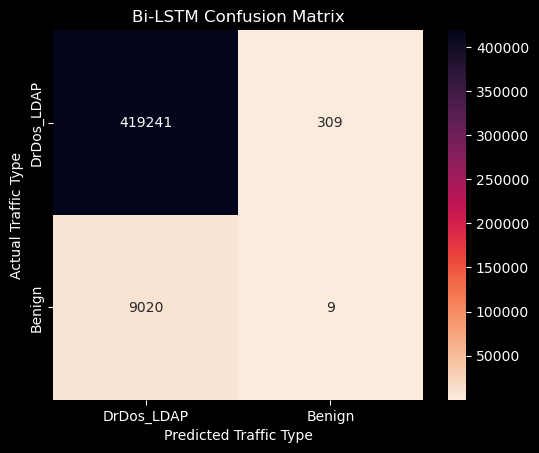

In [30]:
# Création et affichage d'une matrice de confusion : #

to_heat_map =[[true_negatif,false_positif], 
              [false_negatif,true_positif]]

to_heat_map = pd.DataFrame(to_heat_map, 
                           index = ["DrDos_LDAP","Benign"], 
                           columns = ["DrDos_LDAP","Benign"])

sns.heatmap(to_heat_map, 
                 cmap='rocket_r',
                 annot = True, 
                 square=True,
                 fmt = '')
plt.xlabel('Predicted Traffic Type')
plt.ylabel('Actual Traffic Type')
plt.title('Bi-LSTM Confusion Matrix');

In [31]:
model.save('lstm_model.h5')
# Sauvegarde du modèle

In [32]:
# Récupérer la première ligne du dataset et créer un fichier csv avec cette ligne #
with open("DrDoS_LDAP.csv", 'r') as f1, open("ba.csv", 'w') as f2 :
    i = 0
    while i != 2 :
        line = f1.readline()
        f2.write(line)
        i+=1

In [33]:
# Ouvrir le fichier csv nouvellement crée #
data = pd.read_csv(
    "ba.csv", 
    dtype={'SimillarHTTP': 'object'},
    #blocksize='64MB')

SyntaxError: incomplete input (122448783.py, line 4)

In [ ]:
data
# Affichage du contenu de la variable data

In [ ]:
data.columns = data.columns.str.replace(' ', '')
# Retirer les espaces dans le dataset

In [ ]:
data.shape
# Donne la forme du dataframe :
# un tuple de dimensions indiquant le nombre de lignes : 1
# et le nombre de colonnes : 88

In [ ]:
data.drop(columns=['FlowID', 'SourceIP', 'DestinationIP', 'Timestamp', 'SimillarHTTP', 'SourcePort', 'DestinationPort'], inplace=True)
# Présence de chaque label en % dans le dataset

In [ ]:
data.dropna(inplace=True)
# Supprime les valeurs manquantes dans le dataset

In [ ]:
data
# Affichage du contenu de la variable data

In [ ]:
cols = data.drop(columns=['Label']).columns.tolist()
for col in cols:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)
    
# Conversion de l'ensemble des colonnes en format numérique 
# si elle n'est pas convertible est devient NaN ('coerce')
# Les valeurs NaN deviennent 0 (fillna(0))

In [ ]:
X = data.drop(columns=["Label"], axis=1)
# Conversion de données catégorielles en variables indicatrices

In [ ]:
X.shape
# Affichage de la profondeur de X

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardisation : #
std = StandardScaler()
line = pd.DataFrame(
    std.fit_transform(X),
    columns = X.columns)


X = X.values.reshape(
    X.shape[0], 
    X.shape[1], 1)
# 
X.shape

In [ ]:
from tensorflow.keras.models import load_model 

loaded_model = load_model('./lstm_model.h5')
# Charger le modèle
result = loaded_model.predict(X, verbose = 1)
# Prédiction
result = result.flatten().round()
result = result.tolist()
print(result)